In [15]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [17]:
print("Number of train images in minist database:", train_images.shape)
print("Number of test images in minist database:", test_images.shape)


Number of train images in minist database: (60000, 28, 28)
Number of test images in minist database: (10000, 28, 28)


In [18]:
print("Number of train labels in minist database:", train_labels.shape)
print("Number of test labels in minist database:", test_labels.shape)

Number of train labels in minist database: (60000,)
Number of test labels in minist database: (10000,)


<Figure size 640x480 with 0 Axes>

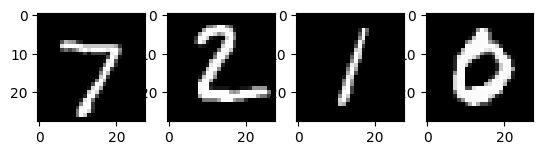

In [19]:
plt.figure()
fig, ax = plt.subplots(1,4)
ax[0].imshow(test_images[0], cmap=plt.cm.gray)
ax[1].imshow(test_images[1], cmap=plt.cm.gray)
ax[2].imshow(test_images[2], cmap=plt.cm.gray)
ax[3].imshow(test_images[3], cmap=plt.cm.gray)
plt.show()

In [20]:
from keras import models
from keras import layers

In [21]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [22]:
import numpy as np
train_images = train_images.reshape(train_images.shape[0], (train_images.shape[1]*train_images.shape[2]))/255
train_images.astype(np.float32)
print(train_images.shape)

test_images = test_images.reshape(test_images.shape[0], (test_images.shape[1]*test_images.shape[2]))/255
test_images.astype(np.float32)
print(test_images.shape)





(60000, 784)
(10000, 784)


In [23]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [24]:
epochs = 5
batch_size = 128

In [25]:
net= network.fit(train_images, train_labels,
                        batch_size = batch_size,
                        epochs = epochs)

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.2637 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1072 - accuracy: 0.9675
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0713 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0511 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0390 - accuracy: 0.9885


In [26]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0609 - accuracy: 0.9808
test_acc: 0.9807999730110168


In [28]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
# alternatively from scikeras.wrappers import KerasClassifier

def create_model():
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    return network

model = KerasClassifier(build_fn=create_model)

par1_batch = [32, 64]
par2_epoch = [3, 5]

param_grid = dict(batch_size=par1_batch,
                  epochs=par2_epoch
                  )

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv = 3
                    )

grid_results = grid.fit(train_images, train_labels)

print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

<ipython-input-28-bca032deda26>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


ValueError: ignored

In [ ]:
#!pip install scikeras[tensorflow]